### Apply different type of regularization to the problem 

#### import the package need

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

%matplotlib inline

#### load the dataset 

In [3]:
data = scipy.io.loadmat('datasets/data.mat')
train_X = data['X'].T
train_Y = data['y'].T
test_X = data['Xval'].T
test_Y = data['yval'].T

print(train_X.shape, test_X.shape)

(2, 211) (2, 200)


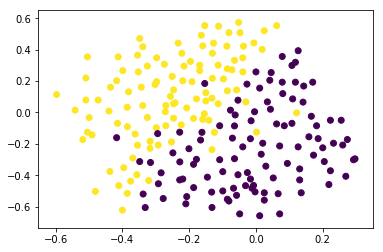

In [4]:
#view the dataset
plt.scatter(train_X[0,:], train_X[1,:], c = train_Y[0,:])

m = 211
feature = 2
tf.reset_default_graph()

#### create the placeholder for the input and output

In [5]:
X = tf.placeholder(dtype=tf.float32, shape= [2,None], name = 'Input')
Y = tf.placeholder(dtype = tf.float32, shape = [1,None], name = 'Output')

#### Initialize the weight 

In [6]:
W1 = tf.Variable(tf.random_normal([4,feature] ,seed = 1) * tf.sqrt(1 / feature),dtype=tf.float32,name = 'Weight_layer_1' )
b1 = tf.Variable( tf.zeros([4,1]),dtype=tf.float32, name = 'bias_layer_1')

W2 = tf.Variable(tf.random_normal([2,4], seed = 1) * tf.sqrt(1 / 4),dtype=tf.float32, name = 'Weight_layer_2')
b2 = tf.Variable(tf.zeros([2,1]),dtype=tf.float32, name = 'bias_layer_2')

W3 = tf.Variable(tf.random_normal([1,2], seed = 1), dtype=tf.float32, name = 'Weight_layer_3')
b3 = tf.Variable(tf.zeros([1,1]) ,dtype=tf.float32, name = 'bias_layer_3')

#### Forward propagation

In [7]:
A0 = X

Z1 = tf.matmul(W1,A0) + b1
A1 = tf.nn.relu(Z1, name = 'hidden_layer_1')

Z2 = tf.matmul(W2,A1) + b2
A2 = tf.nn.relu(Z2, name = 'hidden_layer_2')

Z3 = tf.matmul(W3, A2) + b3
A3 = tf.sigmoid(Z3, name = 'output_layer')

#### initialize cost and Hyperparameter  

In [8]:
cost = tf.reduce_mean(Y * tf.log(A3) + (1 - Y) * tf.log(1 - A3)) * (-1)

optimize = tf.train.AdamOptimizer(learning_rate=0.3,beta1=0.9, beta2=0.999, epsilon=1e-04).minimize(cost)

init = tf.global_variables_initializer()

batch_size = 32
batch_iteration = 6

epoch = 500

iteration_cost = []

iter_cost = []

In [9]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epoch):
        
        for j in range(batch_iteration):
            
            _,l = sess.run([optimize, cost], {X:train_X[:,j*batch_size:(j+1)*batch_size], Y:train_Y[:,j*batch_size:(j+1)*batch_size]})
            iteration_cost.append(l)
            
        _,l = sess.run([optimize, cost], {X:train_X[:,192:], Y:train_Y[:,192:]})
        iteration_cost.append(l)
            
    w_1 = W1.eval()
    b_1 = b1.eval()
    w_2 = W2.eval()
    b_2 = b2.eval()
    w_3 = W3.eval()
    b_3 = b3.eval()

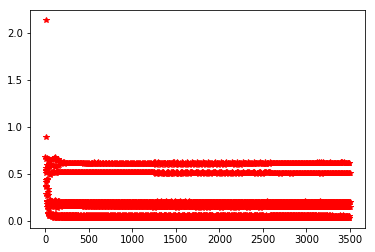

In [10]:
plt.plot(iteration_cost,'r*')

In [11]:
def relu(z):
    return np.maximum(0,z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
test = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])

tanh(test)

array([-0.9993293 , -0.99505475, -0.96402758, -0.76159416,  0.        ,
        0.76159416,  0.96402758,  0.99505475,  0.9993293 ])

#### training error and prediction error

In [12]:

A_0 = train_X

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3)

correct_train_number = np.sum(np.abs(train_Y - A_3) < 0.5)

print('Training accuracy ', correct_train_number / 211)

Training accuracy  0.9336492891


In [13]:
A_0 = test_X

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3)


correct_test_number = np.sum(np.abs(test_Y - A_3) < 0.5)

print('Testing accuracy ', correct_test_number / 200)

Testing accuracy  0.915


In [32]:
x = []
val = np.arange(-.75,.65,.01)
for i in val:
    for j in val:
        x.append([i, j])

A_0 = np.array(x).T

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3)



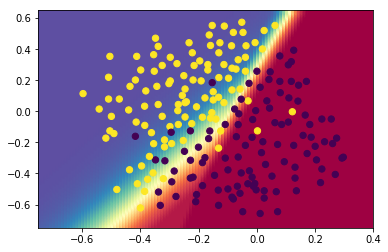

In [33]:
# Visualize the data boundary
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plt.scatter(A_0[0, :], A_0[1, :], c=A_3[0,:], s=40, cmap=plt.cm.Spectral)

plt.hold
plt.scatter(train_X[0,:], train_X[1,:], c = train_Y[0,:],s=40)

#### Add l2 regularization and check how it change

In [62]:
X = tf.placeholder(dtype=tf.float32, shape= [2,None], name = 'Input')
Y = tf.placeholder(dtype = tf.float32, shape = [1,None], name = 'Output')

In [88]:
W1 = tf.Variable(tf.random_normal([4,feature] ,seed = 1) * tf.sqrt(1 / feature),dtype=tf.float32,name = 'Weight_layer_1' )
b1 = tf.Variable( tf.zeros([4,1]),dtype=tf.float32, name = 'bias_layer_1')

W2 = tf.Variable(tf.random_normal([2,4], seed = 2) * tf.sqrt(1 / 4),dtype=tf.float32, name = 'Weight_layer_2')
b2 = tf.Variable(tf.zeros([2,1]),dtype=tf.float32, name = 'bias_layer_2')

W3 = tf.Variable(tf.random_normal([1,2], seed = 3), dtype=tf.float32, name = 'Weight_layer_3')
b3 = tf.Variable(tf.zeros([1,1]) ,dtype=tf.float32, name = 'bias_layer_3')

In [89]:
A0 = X

Z1 = tf.matmul(W1,A0) + b1
A1 = tf.nn.relu(Z1, name = 'hidden_layer_1')

Z2 = tf.matmul(W2,A1) + b2
A2 = tf.nn.relu(Z2, name = 'hidden_layer_2')

Z3 = tf.matmul(W3, A2) + b3
A3 = tf.sigmoid(Z3, name = 'output_layer')

In [117]:
batch_size = 32
batch_iteration = 6

epoch = 500

lamd = 0.01

l2 = tf.reduce_mean(tf.square(W1)) + tf.reduce_mean(tf.square(W2))+ tf.reduce_mean(tf.square(W3)) 

cost = tf.reduce_mean(Y * tf.log(A3) + (1 - Y) * tf.log(1 - A3)) * (-1) + lamd * l2

optimize = tf.train.AdamOptimizer(learning_rate=0.01,beta1=0.9, beta2=0.999, epsilon=1e-04).minimize(cost)

init = tf.global_variables_initializer()


iteration_cost = []

iter_cost = []

In [118]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epoch):
        
        for j in range(batch_iteration):
            
            _,l = sess.run([optimize, cost], {X:train_X[:,j*batch_size:(j+1)*batch_size], Y:train_Y[:,j*batch_size:(j+1)*batch_size]})
            iteration_cost.append(l)
            
        _,l = sess.run([optimize, cost], {X:train_X[:,192:], Y:train_Y[:,192:]})
        iteration_cost.append(l)
            
    w_1 = W1.eval()
    b_1 = b1.eval()
    w_2 = W2.eval()
    b_2 = b2.eval()
    w_3 = W3.eval()
    b_3 = b3.eval()

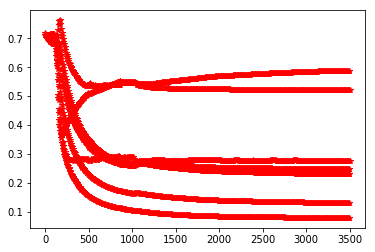

In [119]:
plt.plot(iteration_cost,'r*')

#### Training and prediction accuracy

In [120]:
A_0 = train_X

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3)

correct_train_number = np.sum(np.abs(train_Y - A_3) < 0.5)

print('Training accuracy ', correct_train_number / 211)

Training accuracy  0.928909952607


In [122]:
A_0 = test_X

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3)


correct_test_number = np.sum(np.abs(test_Y - A_3) < 0.5)

print('Testing accuracy ', correct_test_number / 200)

Testing accuracy  0.93


In [124]:
x = []
val = np.arange(-.75,.65,.01)
for i in val:
    for j in val:
        x.append([i, j])

A_0 = np.array(x).T

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3)



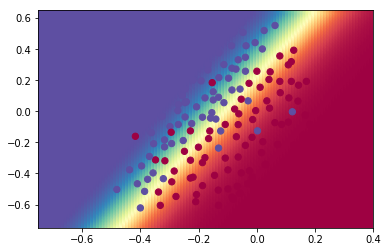

In [126]:
# Visualize the data boundary
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plt.scatter(A_0[0, :], A_0[1, :], c=A_3[0,:], s=40, cmap=plt.cm.Spectral)

plt.hold
plt.scatter(train_X[0,:], train_X[1,:], c = train_Y[0,:],s=40, cmap=plt.cm.Spectral)

#### Comment 
#### Compare both decision boundary regularized more of straight line than unregularized model.
#### Regularized model where testing accuracy very close to training accuracy.